In [62]:
import lcdb
import pandas as pd
import itertools
import numpy as np

In [63]:
curve = lcdb.get_curve(3, "sklearn.linear_model.LogisticRegression")
anchors, scores_train, scores_valid, scores_test = curve
print(anchors)
print(scores_train)
print(scores_valid)
print(scores_test)

[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 512, 724, 1024, 1448, 2048, 2588]
[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.913, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9565, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9565, 1.0, 1.0, 1.0, 1.0, 0.9565, 1.0, 1.0, 1.0, 1.0, 0.9565, 0.9565, 

In [64]:
len(anchors)

16

In [66]:
np.asarray(scores_train).shape

(16, 125)

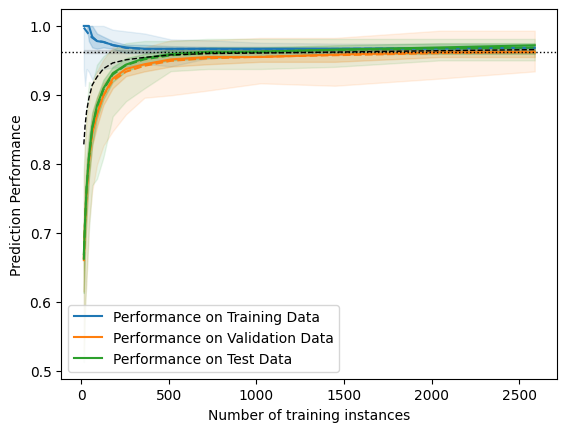

In [43]:
fig = lcdb.plot_train_and_test_curve(curve)

In [44]:
lcdb.get_meta_features()

,openmlid,Name,AutoCorrelation,ClassEntropy,Dimensionality,EquivalentNumberOfAtts,MajorityClassSize,MaxAttributeEntropy,MaxKurtosisOfNumericAtts,MaxMeansOfNumericAtts,...,Quartile2MutualInformation,Quartile2SkewnessOfNumericAtts,Quartile2StdDevOfNumericAtts,Quartile3AttributeEntropy,Quartile3KurtosisOfNumericAtts,Quartile3MeansOfNumericAtts,Quartile3MutualInformation,Quartile3SkewnessOfNumericAtts,Quartile3StdDevOfNumericAtts,NumberOfFeaturesAfterBinarization
0,3,kr-vs-kp,0.999061,0.998576,0.011577,52.140402,1669.0,0.995652,NaN,NaN,...,0.005426,NaN,NaN,0.913233,NaN,NaN,0.018486,NaN,NaN,74
1,6,letter,0.040902,4.699811,0.000850,NaN,813.0,NaN,2.075245,8.338850,...,NaN,0.254335,2.293372,NaN,1.172839,7.726012,NaN,0.653378,2.547423,16
2,12,mfeat-factors,0.995498,3.321928,0.108500,NaN,200.0,NaN,1.701286,1141.570500,...,NaN,-0.014119,30.290066,NaN,0.011386,684.502750,NaN,0.366513,91.596871,216
3,14,mfeat-fourier,0.995498,3.321928,0.038500,NaN,200.0,NaN,1.994923,0.377311,...,NaN,0.554228,0.052759,NaN,0.438104,0.155768,NaN,0.710785,0.086335,76
4,16,mfeat-karhunen,0.995498,3.321928,0.032500,NaN,200.0,NaN,0.580943,2.891171,...,NaN,-0.020816,1.647651,NaN,0.071655,0.332461,NaN,0.059177,2.661480,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,41169,helena,0.023085,5.977668,0.000429,NaN,4005.0,NaN,266.331723,125.499915,...,NaN,0.389840,3.054119,NaN,8.783123,33.658881,NaN,1.009397,15.243270,27
215,41946,Sick_numeric,0.886502,0.332351,0.007953,NaN,3541.0,NaN,3772.000000,126.282609,...,NaN,2.296469,0.241253,NaN,66.273469,2.271209,NaN,8.260649,0.807496,29
216,42732,sf-police-incidents,0.794053,NaN,0.000004,NaN,1945704.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25195
217,42733,Click_prediction_small,0.717025,NaN,0.000300,NaN,33220.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122916


In [45]:
df = lcdb.get_meta_features()

In [46]:
type(df)

pandas.core.frame.DataFrame

In [47]:
openmlid_list = list(df.iloc[:, 0])

In [70]:
learners_list = [
"SVC_linear",
"SVC_poly",
"SVC_rbf",
"SVC_sigmoid",
"sklearn.tree.DecisionTreeClassifier",
"sklearn.tree.ExtraTreeClassifier",
"sklearn.linear_model.LogisticRegression",
"sklearn.linear_model.PassiveAggressiveClassifier",
"sklearn.linear_model.Perceptron",
"sklearn.linear_model.RidgeClassifier",
"sklearn.linear_model.SGDClassifier",
"sklearn.neural_network.MLPClassifier",
"sklearn.discriminant_analysis.LinearDiscriminantAnalysis",
"sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis",
"sklearn.naive_bayes.BernoulliNB",
"sklearn.naive_bayes.MultinomialNB",
"sklearn.neighbors.KNeighborsClassifier",
"sklearn.ensemble.ExtraTreesClassifier",
"sklearn.ensemble.RandomForestClassifier",
"sklearn.ensemble.GradientBoostingClassifier",
]

In [71]:
prod = list(itertools.product(openmlid_list, learners_list))

In [76]:
def get_anchors_and_scores(dataset, learner):
    anchors, scores_train, _, _ = lcdb.get_curve(dataset, learner)
    avg_scores = np.nanmean(scores_train, axis=1)
    return anchors, avg_scores

In [78]:
anchors = []
scores = []
for i, (d, l) in enumerate(prod):
    print(i)
    try:
        anc, avg_scores = get_anchors_and_scores(d, l)
        anchors.append(anc)
        scores.append(avg_scores)
    except Exception:
        continue

0
1
2
3
4


KeyboardInterrupt: 

In [ ]:
anchors

In [ ]:
scores